<a href="https://colab.research.google.com/github/i-am-Aryan-Raj/Loan-Approvals/blob/main/Loan_Approval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


## Loading dataset

Since the dataset is small, use of apis is not needed

In [ ]:
loan_approval = pd.read_csv('/content/loan_approval_dataset.csv')
loan_approval.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [ ]:
loan_approval.shape

(4269, 13)

In [ ]:
#checking for missing values
loan_approval.isna().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [ ]:
loan_approval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


Converting object columns to integers

In [ ]:
loan_approval.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [ ]:
loan_approval.columns = loan_approval.columns.str.strip()
loan_approval.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [ ]:
loan_approval.head(2)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected


In [ ]:
loan_approval['loan_status'][0]

' Approved'

In [ ]:
category_mapping = {' Graduate': 1, ' Not Graduate': 0, ' Yes': 1, ' No': 0, ' Approved': 1, ' Rejected': 0}
columns_to_convert = ['education', 'self_employed', 'loan_status']


In [ ]:
loan_approval[columns_to_convert] = loan_approval[columns_to_convert].replace(category_mapping)
loan_approval.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


## Visualising data

In [ ]:
import matplotlib.pyplot as plt

array([[<Axes: title={'center': 'loan_id'}>,
        <Axes: title={'center': 'no_of_dependents'}>,
        <Axes: title={'center': 'education'}>,
        <Axes: title={'center': 'self_employed'}>],
       [<Axes: title={'center': 'income_annum'}>,
        <Axes: title={'center': 'loan_amount'}>,
        <Axes: title={'center': 'loan_term'}>,
        <Axes: title={'center': 'cibil_score'}>],
       [<Axes: title={'center': 'residential_assets_value'}>,
        <Axes: title={'center': 'commercial_assets_value'}>,
        <Axes: title={'center': 'luxury_assets_value'}>,
        <Axes: title={'center': 'bank_asset_value'}>],
       [<Axes: title={'center': 'loan_status'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

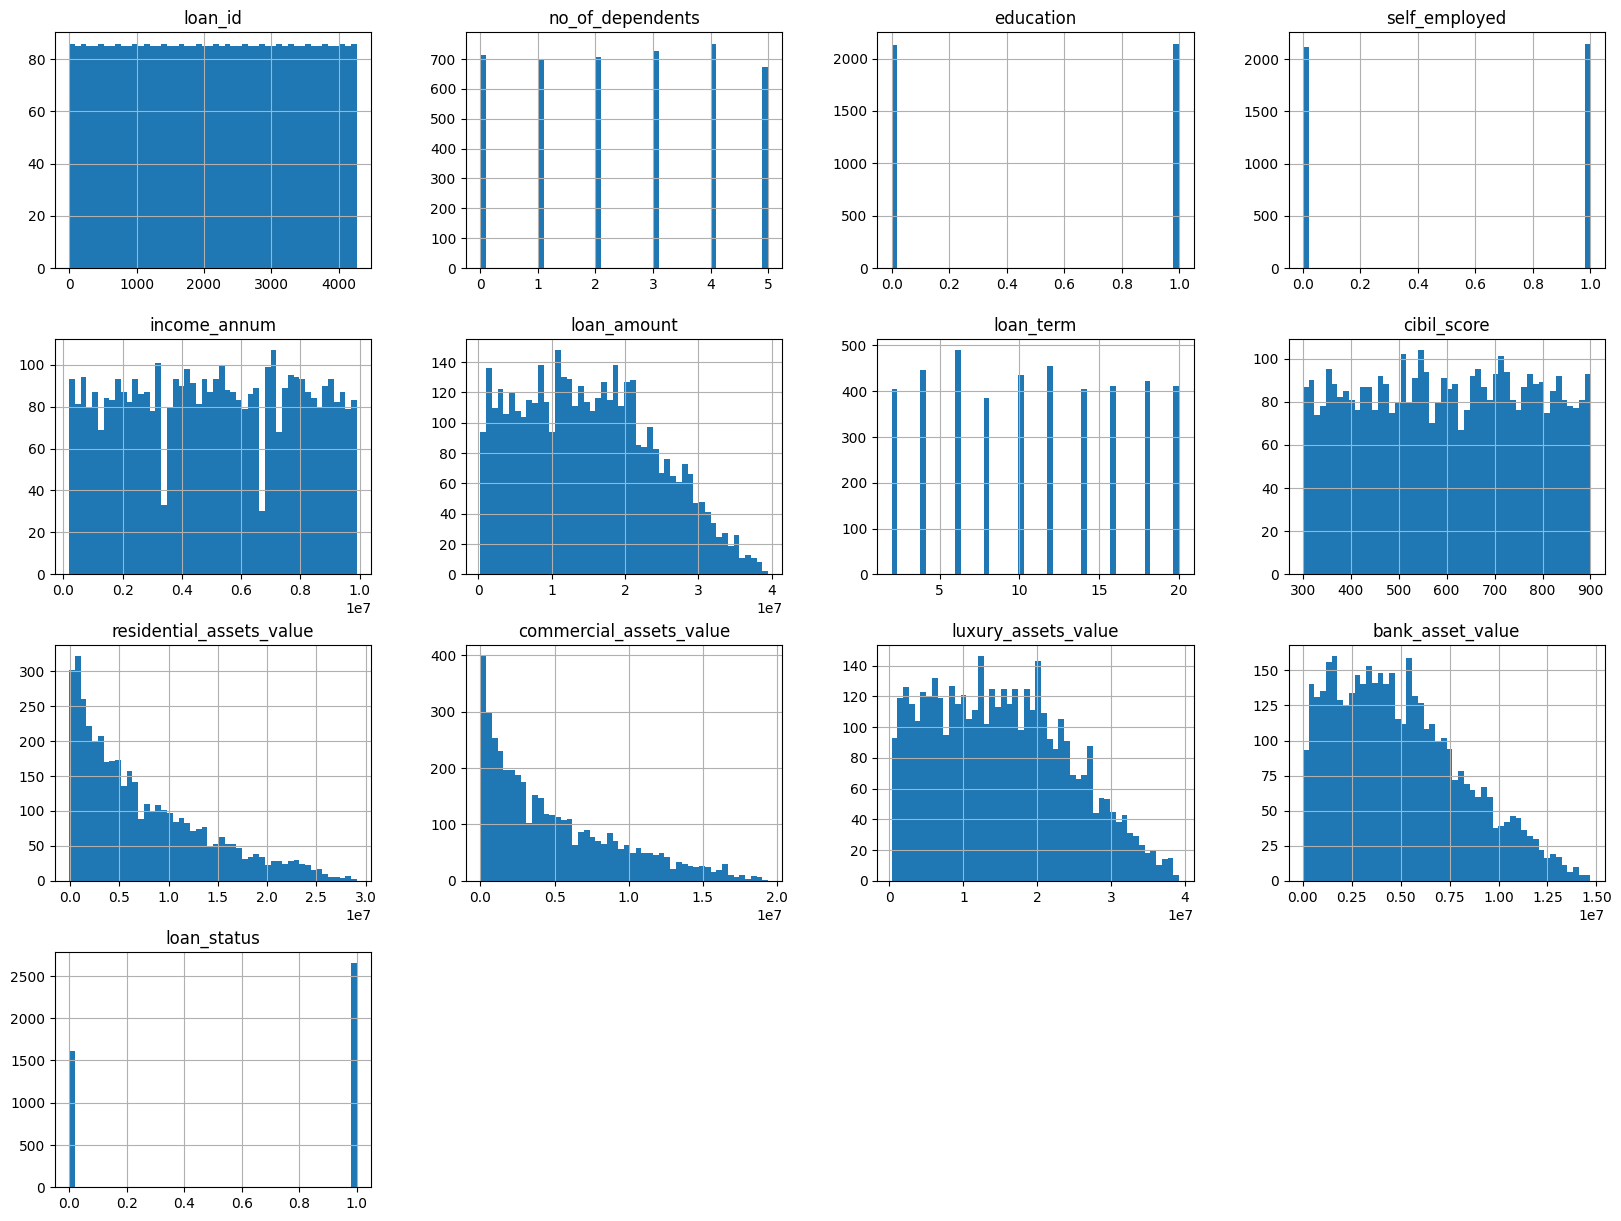

In [ ]:
loan_approval.hist(bins=50, figsize= (20, 15))

## Splitting data into training and testing sets

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
loan_status = loan_approval['loan_status'].copy()
loan_status.info()

<class 'pandas.core.series.Series'>
RangeIndex: 4269 entries, 0 to 4268
Series name: loan_status
Non-Null Count  Dtype
--------------  -----
4269 non-null   int64
dtypes: int64(1)
memory usage: 33.5 KB


In [ ]:
attributes = loan_approval[['no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value']]
attributes.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000


In [ ]:
attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   no_of_dependents          4269 non-null   int64
 1   education                 4269 non-null   int64
 2   self_employed             4269 non-null   int64
 3   income_annum              4269 non-null   int64
 4   loan_amount               4269 non-null   int64
 5   loan_term                 4269 non-null   int64
 6   cibil_score               4269 non-null   int64
 7   residential_assets_value  4269 non-null   int64
 8   commercial_assets_value   4269 non-null   int64
 9   luxury_assets_value       4269 non-null   int64
 10  bank_asset_value          4269 non-null   int64
dtypes: int64(11)
memory usage: 367.0 KB


In [ ]:
# Assuming X contains your features and y contains your target variable
X_train, X_temp, y_train, y_temp = train_test_split(attributes, loan_status, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [ ]:
X_train.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
3404,4,0,0,2800000,8300000,14,381,3200000,1100000,9100000,1500000
781,3,0,1,9900000,20400000,4,865,26300000,3600000,36500000,12800000
3002,4,1,1,3500000,10700000,8,883,200000,2300000,8400000,2000000
4047,3,0,0,6400000,23000000,8,520,12100000,11400000,16000000,3800000
3391,2,1,1,3300000,6700000,8,845,1300000,4600000,12300000,3200000


In [ ]:
y_train.head()

3404    0
781     1
3002    1
4047    0
3391    1
Name: loan_status, dtype: int64

In [ ]:
X_train.shape, X_val.shape, X_test.shape

((2988, 11), (640, 11), (641, 11))

## Checking Correlations

In [ ]:
correlation_matrix = loan_approval.corr()

In [ ]:
correlation_matrix['loan_status'].sort_values(ascending = False)

loan_status                 1.000000
cibil_score                 0.770518
loan_id                     0.017685
loan_amount                 0.016150
commercial_assets_value     0.008246
education                   0.004918
self_employed               0.000345
bank_asset_value           -0.006778
residential_assets_value   -0.014367
income_annum               -0.015189
luxury_assets_value        -0.015465
no_of_dependents           -0.018114
loan_term                  -0.113036
Name: loan_status, dtype: float64

In [ ]:
import seaborn as sns


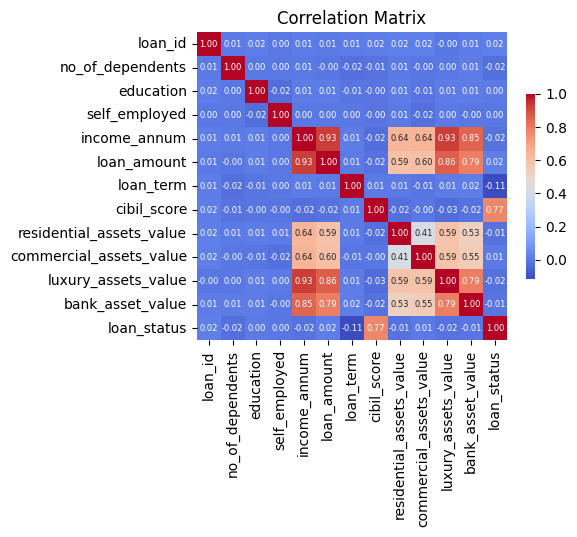

In [ ]:
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 6}, cbar_kws={"shrink": 0.6})
plt.title("Correlation Matrix")
plt.show()

## Creating pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


In [ ]:
pipeline = Pipeline([('std_scaler', StandardScaler())])

In [ ]:
X_train_final = pipeline.fit_transform(X_train)

In [ ]:
X_train_final.shape

(2988, 11)

In [ ]:
X_val_num = pipeline.transform(X_val)
X_test_num = pipeline.transform(X_test)

In [ ]:
X_val_num.shape, X_test_num.shape

((640, 11), (641, 11))

# Selecting ML Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Trying out different models one by one

Logistic Regression

In [ ]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train_final, y_train)

y_pred_1 = logistic_model.predict(X_val_num)

accuracy_1 = accuracy_score(y_val, y_pred_1)
print(f"Logistic Regression Accuracy: {accuracy_1:.2f}")

Logistic Regression Accuracy: 0.90


Decision Trees

In [ ]:
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train_final, y_train)

y_pred_2 = decision_tree_model.predict(X_val_num)

accuracy_2 = accuracy_score(y_val, y_pred_2)
print(f"Decision Tree Accuracy: {accuracy_2:.2f}")

Decision Tree Accuracy: 0.97


Random Forests

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_final, y_train)

y_pred_rf = rf_model.predict(X_val_num)

accuracy_rf = accuracy_score(y_val, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")

Random Forest Accuracy: 0.98


### Using Neural Networks

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

In [ ]:
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=X_train_final.shape[1]))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)


In [ ]:
model.fit(X_train_final, y_train, epochs=20, batch_size=32, validation_data=(X_val_num, y_val), callbacks=[early_stopping])


Epoch 1/20
94/94 [==============================] - 2s 9ms/step - loss: 0.5907 - accuracy: 0.7179 - val_loss: 0.4991 - val_accuracy: 0.7969
Epoch 2/20
94/94 [==============================] - 0s 4ms/step - loss: 0.4287 - accuracy: 0.8681 - val_loss: 0.3838 - val_accuracy: 0.8656
Epoch 3/20
94/94 [==============================] - 0s 4ms/step - loss: 0.3298 - accuracy: 0.9116 - val_loss: 0.3132 - val_accuracy: 0.8891
Epoch 4/20
94/94 [==============================] - 0s 4ms/step - loss: 0.2728 - accuracy: 0.9244 - val_loss: 0.2756 - val_accuracy: 0.8984
Epoch 5/20
94/94 [==============================] - 0s 4ms/step - loss: 0.2422 - accuracy: 0.9301 - val_loss: 0.2554 - val_accuracy: 0.9047
Epoch 6/20
94/94 [==============================] - 0s 3ms/step - loss: 0.2246 - accuracy: 0.9307 - val_loss: 0.2441 - val_accuracy: 0.9078
Epoch 7/20
94/94 [==============================] - 0s 2ms/step - loss: 0.2133 - accuracy: 0.9334 - val_loss: 0.2355 - val_accuracy: 0.9125
Epoch 8/20
94/94 [==

We can clearly see that Random Forest is the best performing model in all the models. Let's test the model on the testing set.

In [ ]:
y_pred_rf_test = rf_model.predict(X_test_num)

accuracy_rf = accuracy_score(y_test, y_pred_rf_test)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")

Random Forest Accuracy: 0.98


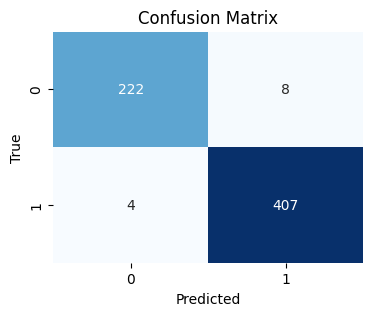

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf_test)

# Ploting the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [ ]:
# Other metrics:

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming 'y_true' is the true labels and 'y_pred' is the predicted labels

# Accuracy
accuracy = accuracy_score(y_test, y_pred_rf_test)
print(f"Accuracy: {accuracy:.4f}")

# Precision
precision = precision_score(y_test, y_pred_rf_test)
print(f"Precision: {precision:.4f}")

# Recall
recall = recall_score(y_test, y_pred_rf_test)
print(f"Recall: {recall:.4f}")

# F1-score
f1 = f1_score(y_test, y_pred_rf_test)
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.9813
Precision: 0.9807
Recall: 0.9903
F1-Score: 0.9855
